## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
p = df['converted'].mean()
print(p)

0.119659193556


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#number of do not match is calculated by counting number of total data - number of match data
num_match =  df.query('group == "treatment" and landing_page == "new_page"')['user_id'].count()
num_match +=  df.query('group == "control" and landing_page == "old_page"')['user_id'].count()
print(df['user_id'].count()-num_match)

3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


no misisng values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#dropping rows that do not meet specification 
df.drop(df.query('group == "treatment" and landing_page == "old_page"').index, inplace=True)

In [9]:
df.drop(df.query('group == "control" and landing_page == "new_page"').index, inplace=True)

In [10]:
df2 = df.copy()

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [13]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
df[df['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [18]:
df[df.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [19]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2.drop(1899, inplace = True)

In [21]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [23]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
#querying mean of control group that converted
p_control_obs = df2.query('group == "control"')['converted'].mean()
p_control_obs

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
#querying mean of treatment group that converted
p_treat_obs = df2.query('group == "treatment"')['converted'].mean()
p_treat_obs

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
(df2.landing_page=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

From research conducted, data is not biased because probability of user landing on new page is the same as landing on old page

From the converted probability, probability of users on new page are converted is 0.118, probability of users on old page are converted is 0.12. There is not enough evidence to conclude that new treatment leads to more conversion.  

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0 : p_{new} <= p_{old} $$
$$H_1 : p_{new} > p_{old} $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [27]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [28]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [29]:
n_new = df2[df2.group == 'treatment'].count()['group']
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [30]:
n_old = df2[df2.group == 'control'].count()['group']
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
new_page_converted = np.random.choice([1,0], n_new, p = [p_new, 1-p_new])
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([1,0], n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
p_diff = new_page_converted.mean()- old_page_converted.mean()

In [34]:
p_diff

-0.0020463029371846769

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
#Simulating 10000 data under the null and calculate the proportion difference
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [36]:
#change p_diffs datatype from list to numpy array 
p_diffs = np.array(p_diffs)

In [37]:
p_diffs.mean()

1.1632426305927508e-05

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

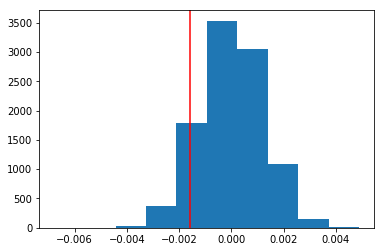

In [38]:
#Plotting proprotion difference simulation data
plt.hist(p_diffs);
plt.axvline(x=p_treat_obs-p_control_obs, c='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
#Calculating the proportion where proprotion of difference in simulation is higher than observation
# Or, area under curve(p-value) on the right hand side red line plot above
(p_diffs > (p_treat_obs-p_control_obs)).mean()

0.90580000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

P-value for this case is larger than the level of significant, 0.9 > 0.05. Which means, there is not enough evidence to backed the alternative hypothesis and conclude that the new page and old page has the same conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

#quering number of control and treatment group that converted converted 
convert_old = df2.query('group == "control" and converted == 1 ').count()['group']
convert_new = df2.query('group == "treatment" and converted == 1').count()['group']

#Finding number of group type for control and treatment
n_old = df2.query('group == "control"').count()['group']
n_new = df2.query('group == "treatment"').count()['group']
convert_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17264

In [41]:
#calculating z score and p value using built in library
z, p_val = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative ='larger')
p_val

0.90505831275902449

In [42]:
z

-1.3109241984234394

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z score is used to calculate the standard deviation from the mean or null value (0). The value of z score is -1.3 which means that the statistics (proportion difference between treatment and control) calculated is differ by 1.3 null standard deviation from the left. 

P value is used to compute the to use hypothesis test, the difference of proportion user converted using new page and old page. The insight is the same. p value for this problem is the same using built in function or manually programming. The conclusion is the same with manually programming. there is not enough evidence to backed the alternative hypothesis and conclude that the new page and old page has the same conversion rate.

<a id='regression'></a>
### Part III - A regression approach


a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is classification problem. Logistic regression is best suited for this problem.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
# adding intercept to dataset
df2['intercept'] = 1

In [44]:
#building dummies variables for landing page, 1= new page, 0 = old page
df2 = pd.get_dummies(df2, columns=['landing_page'])

In [45]:
df2.head()

,user_id,timestamp,group,converted,intercept,landing_page_new_page,landing_page_old_page
0,851104,2017-01-21 22:11:48.556739,control,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,1,1,0,1


In [46]:
#change the name of new page to ab page with 1= new page, 0 = old page
df2.rename(columns={'landing_page_new_page': 'ab_page'}, inplace=True)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [47]:
#Building and fitting logistic regression model using sm.api library
#Independet variable = ab_page, dependent variable = conversion
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 17:06 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p-value associated with ab_page = 0.189 which means that ab_page variable is not significantly correlated with user conversion.
The p-value from logistic regression ab_page is differ from the value in part II because the we test different hypothesis about this case. For logistic regression the null hypothesis is ab test is correlated with user conversion and the alternate hypothesis is ab test is not correlated. This is different from hypothesis that made in part II. Even though, it is different, the insight is the same. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors to add into the regression model. We need to find the variables that correlated with user conversion. On the other hand, adding too many terms will result in over fitting the model. The variability of dependent variable is explained more by independent variable in the old values but, the model is bad at predicting new values

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows. 

In [49]:
#importing country dataset
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [50]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
user_id                  290584 non-null int64
timestamp                290584 non-null object
group                    290584 non-null object
converted                290584 non-null int64
intercept                290584 non-null int64
ab_page                  290584 non-null uint8
landing_page_old_page    290584 non-null uint8
dtypes: int64(3), object(2), uint8(2)
memory usage: 13.9+ MB


In [52]:
#Joining df2 and countries data set, inner join by user id key
df3 = df2.merge(countries, on='user_id')

In [53]:
#Building dummies variable for each country
df3[['CA', 'UK', 'US']]=pd.get_dummies(df3['country'])

In [54]:
#Construct and fit the logistic regression model 
#Building and fitting logistic regression model using sm.api library
#Independet variable = ab_page, country, dependent variable = conversion
mod = sm.Logit(df3.converted, df3[['intercept', 'ab_page','CA', 'UK']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [55]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 17:06 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

From the logistic regression model, inspecting each independent variables, ab_page and country do not significantly affect user conversion rate (p-value < 0.05). Some factors should be investigated to determined what affect user conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and conclusions based on the results.

In [56]:
#adding interaction element between country and ab_page for VIF analysis
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3.head()

,user_id,timestamp,group,converted,intercept,ab_page,landing_page_old_page,country,CA,UK,US,UK_ab_page,CA_ab_page
0,851104,2017-01-21 22:11:48.556739,control,0,1,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,0,1,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,1,0,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,1,0,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,1,1,0,1,US,0,0,1,0,0


In [57]:
#constructing VIF model for the independent variables
#importing VIF and dmatrices library
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('converted ~ab_page+CA+UK+UK_ab_page+CA_ab_page', df3, return_type='dataframe')

In [58]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


In [59]:
vif

,VIF Factor,features
0,2.856817,Intercept
1,1.427098,ab_page
2,2.049235,CA
3,2.030763,UK
4,2.366531,UK_ab_page
5,2.103521,CA_ab_page


VIF factor indicate no interaction between the all the independent variables in logistic regression model.

<a id='conclusions'></a>
## Finishing Up


Based on the project, the new page does not statistically significant on impacting user conversion. 

In addition, linear regression model using ab pages and country as independent variable do not significantly affected user conversion and there is no interaction within the independent variables, ab page and country.
This projects need further research regarding the factors that affect user conversion because none of the indepedent variables succesfully predict the user conversion.

On the other hand, developing new page should take resources. Even though, the user conversion rate is not higher but it is not lower either. If the resource developing new page is scarce, new page development should be stopped. It is better to analyze what do people value in our page to make higher conversion. 

In addition, using the new page should bring a new fresh look for our website if done correctly. Some judgement regarding this is opened for discussion whether to implement or not the new page.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0